# Задачи
1.Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

2.Какой клиент совершил больше всего успешных операций? (success == True)

3.С какой платформы осуществляется наибольшее количество успешных операций?

4.Какую платформу предпочитают премиальные клиенты?

5.Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

6.Постройте график распределения числа успешных операций

7.Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [16]:
import pandas as pd
import seaborn as sns

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [3]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
user_data.shape

(2954, 3)

In [7]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [8]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [9]:
logs.shape

(4500, 4)

In [10]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [11]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [12]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


# Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [13]:
logs.platform.nunique()

3

# Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

In [14]:
success_number = logs.query('success == True')\
                     .groupby(['client'], as_index=False)\
                     .agg({'success':'count'})\
                     .sort_values('success',ascending=False)
success_number

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [15]:
success_number.query('success == 41')\
              .sort_values('client')\
              .client\
              .tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

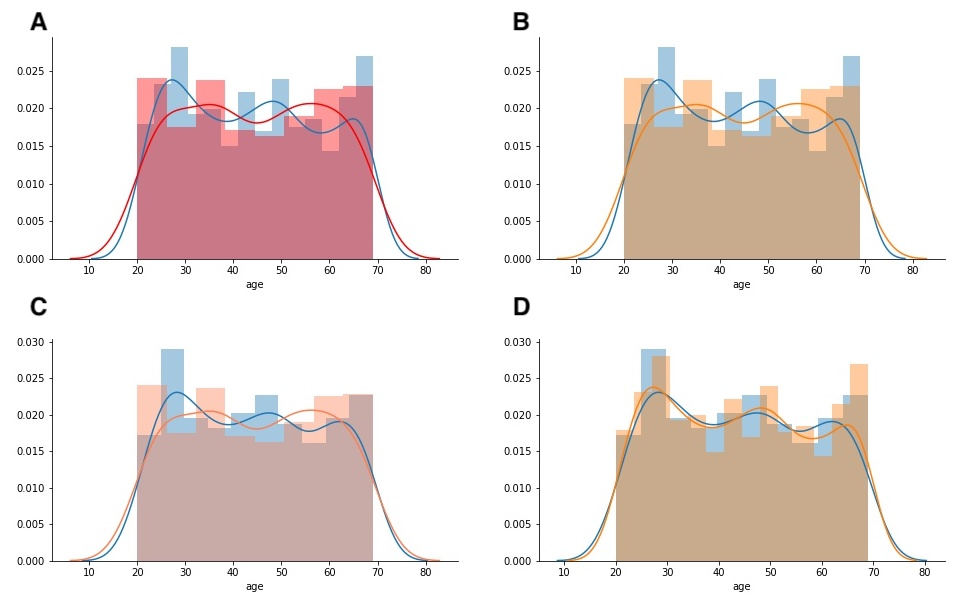

C:\Users\bruta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


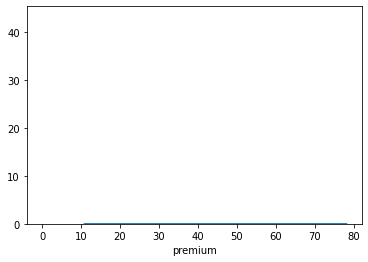

In [23]:
sns.distplot(user_data.age)
sns.distplot(user_data.premium)
